In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [3]:
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [4]:
match.shape

(636, 18)

In [5]:
match['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [6]:
match['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

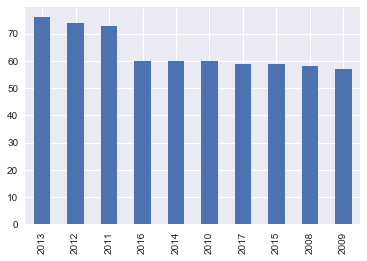

In [8]:
match['season'].value_counts().plot(kind='bar')

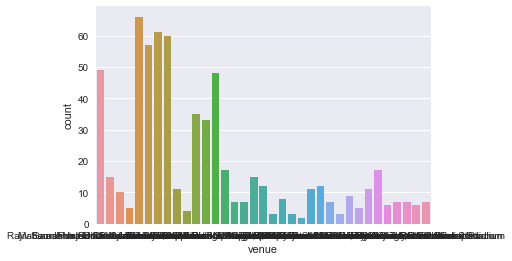

In [9]:
sns.countplot('venue', data=match)
plt.xticks(rotation='vertical')

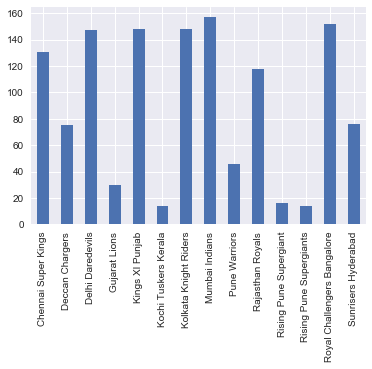

In [11]:
m1=match['team1'].value_counts()
m2=match['team2'].value_counts()
(m1+m2).plot(kind='bar')

In [13]:
match.drop_duplicates(['season'], keep='last')[['season','winner']]

,season,winner
58,2017,Mumbai Indians
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad


In [15]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [22]:
delivery.groupby('batsman')['batsman_runs'].agg('sum').sort_values(ascending=False).head(10)

batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
Name: batsman_runs, dtype: int64

In [23]:
delivery.groupby('batsman').size().sort_values(ascending=False)

batsman
V Kohli             3494
G Gambhir           3433
SK Raina            3369
RG Sharma           3274
S Dhawan            3005
RV Uthappa          2960
DA Warner           2902
MS Dhoni            2680
AM Rahane           2602
CH Gayle            2532
AB de Villiers      2402
KD Karthik          2360
JH Kallis           2291
BB McCullum         2181
M Vijay             2092
YK Pathan           2076
PA Patel            2060
Yuvraj Singh        2050
SR Tendulkar        2044
AT Rayudu           1964
SR Watson           1949
R Dravid            1918
SE Marsh            1913
MK Pandey           1901
V Sehwag            1833
DR Smith            1803
KA Pollard          1674
MEK Hussey          1648
JP Duminy           1634
AC Gilchrist        1555
                    ... 
SB Wagh                3
DJ Muthuswami          3
BE Hendricks           3
Mohammad Nabi          3
CRD Fernando           3
Shivam Sharma          3
VRV Singh              3
P Parameswaran         3
M de Lange       

In [29]:
four_df=delivery[delivery['batsman_runs']==6]

In [32]:
four_df.groupby('bowler').size().sort_values(ascending=False)

bowler
A Mishra           150
PP Chawla          135
Harbhajan Singh    114
RA Jadeja          109
P Kumar            104
DJ Bravo           100
PP Ojha             97
R Vinay Kumar       94
R Ashwin            90
IK Pathan           82
YS Chahal           81
UT Yadav            78
A Nehra             76
KV Sharma           75
RP Singh            70
L Balaji            69
R Bhatia            68
M Muralitharan      67
I Sharma            67
JP Faulkner         67
Z Khan              64
AR Patel            64
KA Pollard          63
SL Malinga          63
MM Sharma           63
SR Watson           62
M Morkel            61
SB Jakati           60
SP Narine           59
JH Kallis           58
                  ... 
RW Price             2
FH Edwards           2
GS Sandhu            2
DL Chahar            2
Tejas Baroka         2
B Laughlin           2
BMAJ Mendis          2
DB Ravi Teja         2
DAJ Bracewell        2
C Nanda              2
B Geeves             1
C Ganapathy          1
Abdu

In [33]:
delivery['dismissal_kind'].value_counts()

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
hit wicket                  9
retired hurt                9
obstructing the field       1
Name: dismissal_kind, dtype: int64

In [36]:
mask1=delivery['dismissal_kind']=='caught'
mask2=delivery['dismissal_kind']=='bowled'
mask3=delivery['dismissal_kind']=='lbw'
mask4=delivery['dismissal_kind']=='stumped'
mask5=delivery['dismissal_kind']=='caught and bowled'
mask6=delivery['dismissal_kind']=='hit wicket'

new_delivery=delivery[mask1 | mask2 | mask3 | mask4 | mask5 | mask6]

In [37]:
new_delivery.groupby('bowler').size().sort_values(ascending=False)

bowler
SL Malinga          154
A Mishra            134
Harbhajan Singh     127
PP Chawla           126
DJ Bravo            122
B Kumar             111
A Nehra             106
R Vinay Kumar       103
Z Khan              102
R Ashwin            100
SP Narine            95
DW Steyn             92
UT Yadav             91
RP Singh             90
P Kumar              90
PP Ojha              89
SR Watson            86
JA Morkel            85
MM Sharma            83
RA Jadeja            82
IK Pathan            80
M Morkel             77
L Balaji             76
DS Kulkarni          76
MM Patel             74
Sandeep Sharma       71
R Bhatia             71
YS Chahal            70
AB Dinda             69
SK Trivedi           65
                   ... 
SS Mundhe             1
SS Agarwal            1
GS Sandhu             1
JDS Neesham           1
PM Sarvesh Kumar      1
SB Joshi              1
LMP Simmons           1
S Vidyut              1
AC Gilchrist          1
RG More               1
GR Napier

In [41]:
mask1=delivery['over']>15
mask2=delivery['total_runs']==0
death_overs=delivery[mask1 & mask2]
death_overs.groupby('bowler')['total_runs'].agg('count').sort_values(ascending=False)

bowler
SL Malinga           320
SP Narine            244
DJ Bravo             243
DW Steyn             211
B Kumar              188
SR Watson            177
UT Yadav             168
R Vinay Kumar        163
A Nehra              160
Z Khan               149
A Mishra             146
RP Singh             146
P Kumar              138
MM Sharma            120
RA Jadeja            117
IK Pathan            116
JP Faulkner          115
PP Chawla            113
M Morkel             112
L Balaji             110
R Ashwin             110
AB Dinda             107
M Muralitharan       103
JJ Bumrah             98
CH Morris             97
MJ McClenaghan        96
DS Kulkarni           94
MG Johnson            92
B Lee                 92
JH Kallis             89
                    ... 
LMP Simmons            2
MG Neser               2
MK Tiwary              2
R Sathish              2
S Rana                 2
C Nanda                2
S Badree               2
KAJ Roach              2
RS Gavaskar       

In [42]:
mask=delivery['bowler']=='R Ashwin'
new_delivery=delivery[mask]

In [47]:
new_delivery.groupby('batsman')['batsman_runs'].agg('sum').sort_values(ascending=False)['GJ Maxwell']

83

In [53]:
def bowler_vs_batsman(bowler,batsman):
    new_delivery=delivery[delivery['bowler']==bowler]
    runs=new_delivery.groupby('batsman')['batsman_runs'].agg('sum').sort_values(ascending=False)[batsman]
    bowls=new_delivery.groupby('batsman')['batsman_runs'].agg('count').sort_values(ascending=False)[batsman]
    sr=(runs/bowls)*100
    print("Bowls bowled", bowls)
    print("Runs Scored", runs)
    print("At a SR", sr)

In [57]:
bowler_vs_batsman('R Ashwin', 'GJ Maxwell')

Bowls bowled 42
Runs Scored 83
At a SR 197.619047619


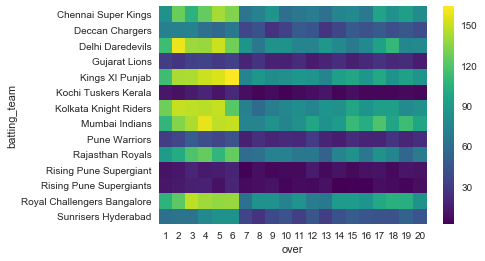

In [63]:
new_delivery=delivery[delivery['batsman_runs']==4]

new_delivery=new_delivery[['batting_team','over','batsman_runs']]
new_delivery.shape

pivot=new_delivery.pivot_table(index='batting_team', columns='over', 
                               values='batsman_runs', aggfunc='count')

sns.heatmap(pivot, cmap='viridis')